Found 671 images belonging to 2 classes.
Found 165 images belonging to 2 classes.


d:\Fake Logo\Fakelogo\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Fake Logo\Fakelogo\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 952ms/step - accuracy: 0.5868 - loss: 1.1168

d:\Fake Logo\Fakelogo\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5885 - loss: 1.1034 - val_accuracy: 0.6687 - val_loss: 0.5413
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5938 - loss: 0.6445 - val_accuracy: 0.6000 - val_loss: 0.4076


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 865ms/step - accuracy: 0.6571 - loss: 0.5906 - val_accuracy: 0.7250 - val_loss: 0.4795
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6562 - loss: 0.5988 - val_accuracy: 0.4000 - val_loss: 0.5188
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 916ms/step - accuracy: 0.6564 - loss: 0.5893 - val_accuracy: 0.7312 - val_loss: 0.4867
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6250 - loss: 0.5440 - val_accuracy: 1.0000 - val_loss: 0.1780
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 884ms/step - accuracy: 0.7061 - loss: 0.5464 - val_accuracy: 0.7500 - val_loss: 0.4798
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6562 - loss: 0.4963 - val_accuracy: 0.4000 - val_loss: 0.5760
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 887ms/step - accuracy: 0.6922 - loss: 0.5724 - val_accuracy: 0.7563 - val_loss: 0.4606
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5625 - loss: 0.5421 - val_accuracy: 0.800

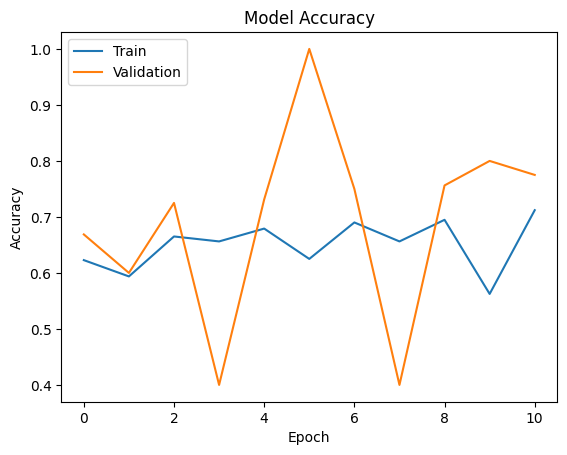

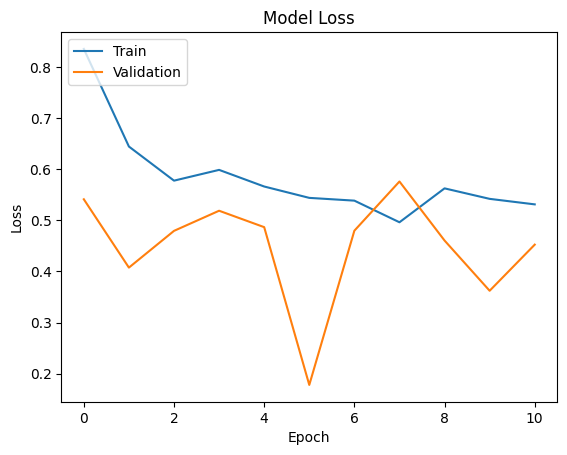

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Set up paths to your dataset
train_dir = 'dataset/train'
validation_dir = 'dataset/test'

# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Save the trained model in native Keras format
model.save('logo_detector_model.keras')

# Load the model
model = load_model('logo_detector_model.keras')

def preprocess_image(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array

def predict_logo(image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    return "Real" if prediction[0] > 0.5 else "Fake"

# Example usage


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [6]:
image_path = 'images.png'
result = predict_logo(image_path)
print(f"The logo is: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step
The logo is: Real


In [7]:
loss, accuracy = model.evaluate(validation_generator)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 444ms/step - accuracy: 0.7345 - loss: 0.4887


In [11]:
print(f"Model Accuracy: {accuracy:.2f}")
print(f"lose:{loss:.3f}")

Model Accuracy: 0.76
lose:0.455
